## WeGo Data Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN


In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [5]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [6]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [7]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [10]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [11]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [12]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


# Q1) What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [13]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [14]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,350329.000000,350329.000000,338861.000000,274738.000000,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,36.158433,-86.769952,-3.188796,18.186021,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,0.059113,0.065548,6.898842,12.261809,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,36.153870,-86.774535,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [15]:
wego['calender_trip_ID'] = wego['TRIP_ID'] + wego['CALENDAR_ID']
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,120575905
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,120575905
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,120575905
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,120575905
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,120575906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120584378
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,120584378
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120584379
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,120584379


In [16]:
wego = wego.dropna(subset= ['ADHERENCE','SCHEDULED_HDWY', 'ACTUAL_HDWY' ])
wego.sort_values('ADHERENCE', ascending = True)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.500000,8.0,120582870
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.800000,5.0,120581043
340625,120230929,1,100377605,2023-09-29,23,2312,1394,350478,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-29 05:37:00,2023-09-29 05:59:30,2023-09-29 15:55:10,-618.166666,12.0,13.683333,1.683333,0,1,0,0,0.0,0,595.666666,2.0,120581407
30377,120230806,3,99601907,2023-08-06,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-06 06:00:00,2023-08-06 06:26:26,2023-08-06 15:02:14,-542.233333,20.0,18.716666,-1.283334,0,1,0,0,0.0,0,515.800000,2.0,120581261
229460,120230910,3,100599172,2023-09-10,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-10 06:00:00,2023-09-10 06:26:36,2023-09-10 14:59:56,-539.933333,20.0,65.200000,45.200000,0,1,0,0,0.0,0,513.333333,2.0,120581365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,120230801,1,99465648,2023-08-01,7,700,3144,348432,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 12:16:00,2023-08-01 10:54:15,2023-08-01 10:59:22,76.633333,20.0,20.333333,0.333333,1,0,0,0,0.0,0,5.116666,8.0,120579233
6156,120230801,1,99465637,2023-08-01,7,700,3144,348428,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 09:47:00,2023-08-01 08:30:18,2023-08-01 08:30:18,76.700000,18.0,23.316666,5.316666,1,0,0,0,0.0,0,0.000000,NaN,120579229
6168,120230801,1,99465649,2023-08-01,7,700,3144,348432,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 12:26:00,2023-08-01 11:07:16,2023-08-01 11:07:16,78.733333,20.0,18.400000,-1.600000,1,0,0,0,0.0,0,0.000000,NaN,120579233
6149,120230801,1,99465630,2023-08-01,7,700,3144,348426,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 08:19:00,2023-08-01 06:43:14,2023-08-01 06:54:20,84.666666,20.0,15.933333,-4.066667,1,0,0,0,0.0,0,11.100000,19.0,120579227


In [17]:
wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120575907
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120575907
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120575907
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120575908
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120575908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,120584377
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,120584378
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120584378
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120584379


In [18]:
wego = wego[wego['STOP_CANCELLED'] != 1]
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120575907
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120575907
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120575907
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120575908
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120575908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,120584377
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,120584378
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120584378
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120584379


In [19]:
wego1 = wego[wego['TRIP_EDGE'] == 2]
wego1

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID


In [20]:
all_routes = len(wego)
all_routes

261787

In [21]:
on_time_routes = wego['ADJUSTED_ONTIME_COUNT'].sum()
on_time_routes

208435

In [22]:
perc_on_time = (on_time_routes / all_routes) * 100
perc_on_time

79.62007280728226

In [23]:
early_routes = wego['ADJUSTED_EARLY_COUNT'].sum()
early_routes

8650

In [24]:
perc_early = (early_routes / all_routes) * 100
perc_early

3.3042129670304483

In [25]:
late_routes = wego['ADJUSTED_LATE_COUNT'].sum()
late_routes

44702

In [26]:
perc_late = (late_routes / all_routes) * 100
perc_late

17.075714225687292

In [27]:
on_time = (wego['ADHERENCE'] >= -6) & (wego['ADHERENCE'] <= 1)
late = wego['ADHERENCE'] < -6                                    
early = wego['ADHERENCE'] > 1

In [28]:
time_adherence = [on_time, late, early]

In [29]:
time_names = ['on_time', 'late', 'early']

In [30]:
wego['time_status'] = np.select(time_adherence, time_names, default='Unknown')
wego

C:\Users\berat\AppData\Local\Temp\ipykernel_28888\796211833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego['time_status'] = np.select(time_adherence, time_names, default='Unknown')


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,time_status
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120575907,on_time
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120575908,on_time
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120575908,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,120584377,on_time
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,120584378,late
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120584378,late
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120584379,on_time


In [31]:
time_counts = wego['time_status'].value_counts()
time_counts

time_status
on_time    208435
late        44702
early        8650
Name: count, dtype: int64

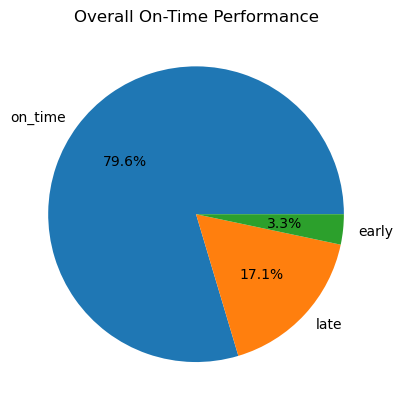

In [32]:
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%')
plt.title('Overall On-Time Performance')
plt.show()

In [33]:
wego_trim = wego[(wego['ADHERENCE'] >= -50) & (wego['ADHERENCE'] <= 50)]
wego_trim

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,time_status
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120575907,on_time
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120575908,on_time
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120575908,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,120584377,on_time
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,120584378,late
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120584378,late
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120584379,on_time


In [34]:
wego_trim['hdwy_perc'] = (wego_trim['HDWY_DEV'] / wego_trim['SCHEDULED_HDWY']) * 100
wego_trim

C:\Users\berat\AppData\Local\Temp\ipykernel_28888\1881732353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trim['hdwy_perc'] = (wego_trim['HDWY_DEV'] / wego_trim['SCHEDULED_HDWY']) * 100


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,time_status,hdwy_perc
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120575907,on_time,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120575908,on_time,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120575908,early,-25.888893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,120584377,on_time,22.388887
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,120584378,late,16.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120584378,late,17.555553
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120584379,on_time,6.222220


C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'count')

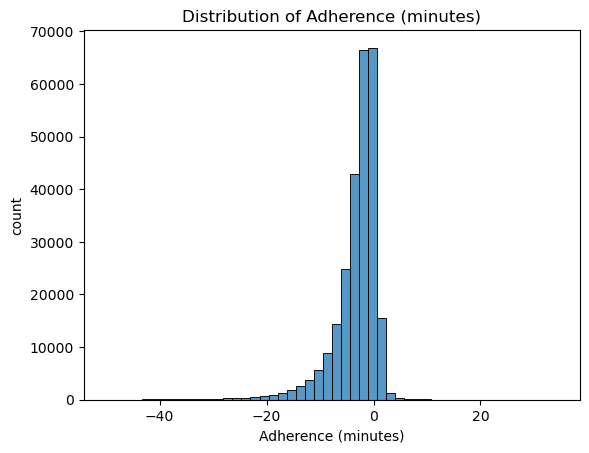

In [35]:
sns.histplot(wego_trim['ADHERENCE'], bins=50)
plt.title('Distribution of Adherence (minutes)')
plt.xlabel('Adherence (minutes)')
plt.ylabel('count')

In [36]:
wego_trim = wego_trim[(wego_trim['hdwy_perc'] >= -300) & (wego_trim['hdwy_perc'] <= 300)]
wego_trim.sort_values('hdwy_perc', ascending = False).head(60)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,time_status,hdwy_perc
119439,120230821,1,100037931,2023-08-21,55,5594,572,352732,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-08-21 07:15:00,2023-08-21 07:19:02,2023-08-21 07:19:02,-4.033333,5.0,20.000000,15.000000,0,0,1,0,0.0,0,0.000000,NaN,120583553,on_time,300.000000
344005,120230929,1,100382154,2023-09-29,55,5504,2356,352524,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-09-29 16:49:00,2023-09-29 17:22:35,2023-09-29 17:22:35,-33.583333,10.0,39.983333,29.983333,0,1,0,0,0.0,0,0.000000,NaN,120583453,late,299.833330
229378,120230910,3,100599088,2023-09-10,23,2310,2217,350389,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-09-10 12:01:00,2023-09-10 12:03:16,2023-09-10 12:03:16,-2.266666,25.0,99.950000,74.950000,0,0,1,0,0.0,0,0.000000,NaN,120581299,on_time,299.800000
229377,120230910,3,100599087,2023-09-10,23,2310,2217,350389,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-10 11:52:00,2023-09-10 11:35:05,2023-09-10 11:52:40,-0.666666,25.0,99.883333,74.883333,0,0,1,0,0.0,0,17.583333,NaN,120581299,on_time,299.533332
210113,120230906,1,100502920,2023-09-06,55,5509,1352,352675,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-09-06 06:48:00,2023-09-06 07:08:13,2023-09-06 07:08:13,-20.216666,5.0,19.966666,14.966666,0,1,0,0,0.0,0,0.000000,NaN,120583581,late,299.333320
229386,120230910,3,100599096,2023-09-10,23,2310,2217,350391,0,FROM DOWNTOWN,DKTL,4.0,0,36.205694,-86.768557,2023-09-10 13:08:00,2023-09-10 13:04:55,2023-09-10 13:07:43,0.283333,25.0,99.750000,74.750000,0,0,1,0,0.0,0,2.800000,NaN,120581301,on_time,299.000000
305414,120230922,1,100152916,2023-09-22,7,700,1202,353254,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-22 06:30:00,2023-09-22 06:33:44,2023-09-22 06:33:44,-3.733333,10.0,39.883333,29.883333,0,0,1,0,0.0,0,0.000000,NaN,120584176,on_time,298.833330
229380,120230910,3,100599090,2023-09-10,23,2310,2217,350390,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-10 12:14:00,2023-09-10 12:10:07,2023-09-10 12:14:19,-0.316666,25.0,99.666666,74.666666,0,0,1,0,0.0,0,4.200000,4.0,120581300,on_time,298.666664
164607,120230829,1,100260665,2023-08-29,52,5204,1542,352119,0,TO DOWNTOWN,NVFG,3.0,0,36.135392,-86.759737,2023-08-29 16:47:00,2023-08-29 16:57:13,2023-08-29 16:57:13,-10.216666,10.0,39.850000,29.850000,0,1,0,0,0.0,0,0.000000,NaN,120582948,late,298.500000
252575,120230914,1,99947748,2023-09-14,22,2202,2549,350139,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-14 16:15:00,2023-09-14 16:03:36,2023-09-14 16:14:02,0.966666,50.0,198.866666,148.866666,0,0,1,0,0.0,0,10.433333,15.0,120581053,on_time,297.733332


C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'count')

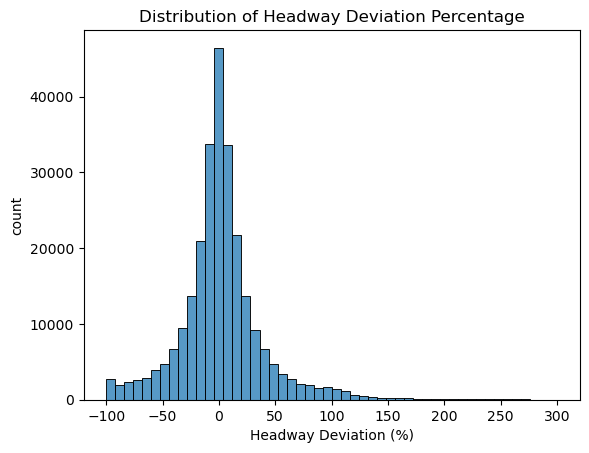

In [37]:
sns.histplot(wego_trim['hdwy_perc'], bins=50)
plt.title('Distribution of Headway Deviation Percentage')
plt.xlabel('Headway Deviation (%)')
plt.ylabel('count')

# 2) How does direction of travel, route, or location affect the headway and on-time performance?


In [38]:
wego['hdwy_perc'] = (wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']) * 100
wego.head(60)

C:\Users\berat\AppData\Local\Temp\ipykernel_28888\1106849567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego['hdwy_perc'] = (wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']) * 100


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,time_status,hdwy_perc
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120575907,on_time,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120575907,on_time,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120575908,on_time,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120575908,early,-25.888893
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,120575909,on_time,-0.333333
15,120230801,1,99457905,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 06:46:00,2023-08-01 06:48:00,2023-08-01 06:48:00,-2.000000,60.0,60.083333,0.083333,0,0,1,0,0.0,0,0.000000,NaN,120575909,on_time,0.138888
16,120230801,1,99457906,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 06:54:00,2023-08-01 06:57:05,2023-08-01 06:57:05,-3.083333,15.0,17.716666,2.716666,0,0,1,0,0.0,0,0.000000,NaN,120575909,on_time,18.111107
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,120575910,on_time,1.555553
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,120575910,on_time,-2.555560


In [39]:
direction = wego.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].sum()
direction

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,104869,4438,30210
TO DOWNTOWN,103566,4212,14492


In [40]:
route = wego.groupby('ROUTE_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].sum()
route

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_ABBR,,,
3,27789,1244,7088
7,9112,336,1921
22,13974,575,1260
23,24839,1099,2200
50,29104,967,4226
52,30365,1382,7675
55,34355,1434,13064
56,38897,1613,7268


In [41]:
location = wego.groupby('TIME_POINT_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].sum()
location

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
TIME_POINT_ABBR,,,
21BK,4152,181,1385
25ACLARK,1104,16,7
28&CHARL,5804,196,859
ARTS,15,0,1
BRCJ,2941,124,799
CH46,5737,226,887
CLFF,958,51,148
CV23,6270,407,585
DCSCC,839,88,613


In [42]:
wego_avg_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = ('hdwy_perc','mean')).reset_index()
wego_avg_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,avg_adherence,avg_hdwy_perc
0,3,FROM DOWNTOWN,-4.756518,7.614302
1,3,TO DOWNTOWN,-2.706954,2.463331
2,7,FROM DOWNTOWN,-3.994180,2.050302
3,7,TO DOWNTOWN,-2.719629,1.784079
4,22,FROM DOWNTOWN,-2.595297,4.105739
5,22,TO DOWNTOWN,-1.414075,2.612516
6,23,FROM DOWNTOWN,-2.561662,4.886387
7,23,TO DOWNTOWN,-1.995938,4.896073
8,50,FROM DOWNTOWN,-3.152613,0.874078
9,50,TO DOWNTOWN,-2.514650,inf


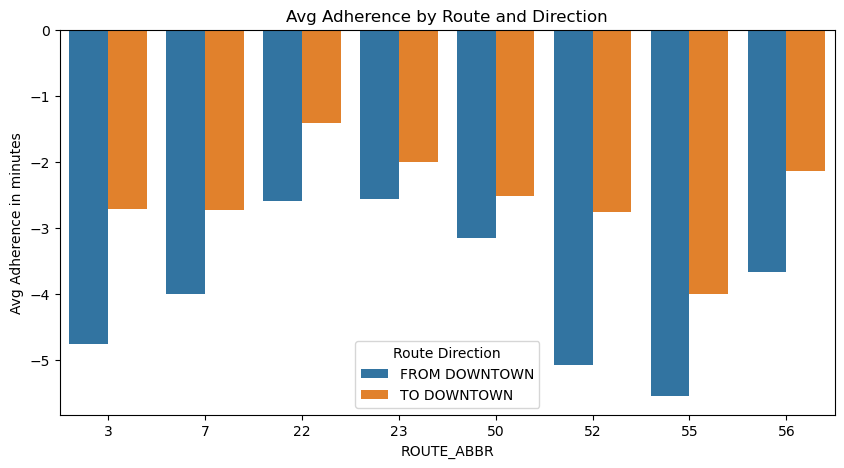

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(data=wego_avg_route, x='ROUTE_ABBR', y='avg_adherence', hue='ROUTE_DIRECTION_NAME')
plt.title('Avg Adherence by Route and Direction')
plt.ylabel('Avg Adherence in minutes')
plt.legend(title='Route Direction')

In [44]:
# note: the reason why the bars are descending is because sns.barplot plots negative values below the zero line.

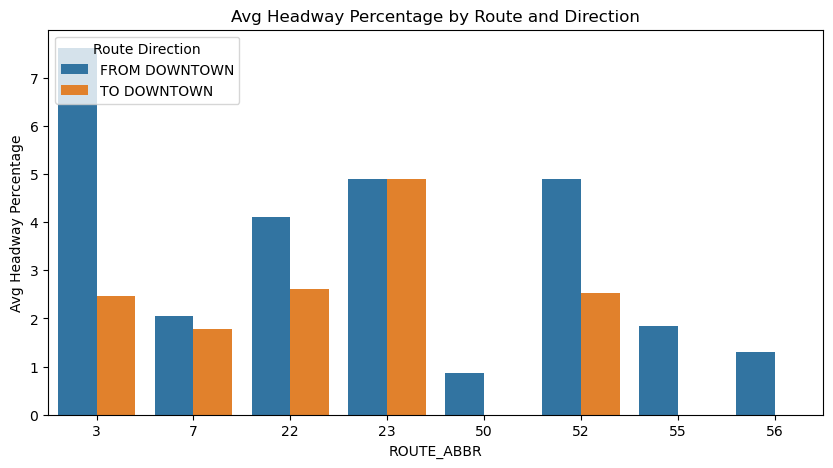

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(data=wego_avg_route, x='ROUTE_ABBR', y='avg_hdwy_perc', hue='ROUTE_DIRECTION_NAME')
plt.title('Avg Headway Percentage by Route and Direction')
plt.ylabel('Avg Headway Percentage')
plt.legend(title='Route Direction')

In [46]:
wego_avg_route = wego.groupby(['ROUTE_ABBR', 'TIME_POINT_ABBR', 'ROUTE_DIRECTION_NAME']).agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = ('hdwy_perc','mean')).reset_index()
wego_avg_route

,ROUTE_ABBR,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,avg_adherence,avg_hdwy_perc
0,3,BRCJ,FROM DOWNTOWN,-5.325567,16.433171
1,3,BRCJ,TO DOWNTOWN,-2.274053,2.937137
2,3,HRWB,FROM DOWNTOWN,-5.387079,7.456715
3,3,HRWB,TO DOWNTOWN,-2.578107,2.548174
4,3,MCC5_5,FROM DOWNTOWN,-3.259879,5.008106
...,...,...,...,...,...
76,56,GXRVRGAT,FROM DOWNTOWN,-3.734753,1.569664
77,56,GXRVRGAT,TO DOWNTOWN,-1.681852,1.272305
78,56,MCC4_18,FROM DOWNTOWN,-3.058394,0.620488
79,56,MEIG,TO DOWNTOWN,-2.147368,inf


In [47]:
wego_avg_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg(on_time = ('ADJUSTED_ONTIME_COUNT', 'sum'), early = ('ADJUSTED_EARLY_COUNT', 'sum'), late = ('ADJUSTED_LATE_COUNT', 'sum')).reset_index()
wego_avg_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,on_time,early,late
0,3,FROM DOWNTOWN,12343,519,5077
1,3,TO DOWNTOWN,15446,725,2011
2,7,FROM DOWNTOWN,4252,212,1252
3,7,TO DOWNTOWN,4860,124,669
4,22,FROM DOWNTOWN,7670,330,916
5,22,TO DOWNTOWN,6304,245,344
6,23,FROM DOWNTOWN,14503,478,1589
7,23,TO DOWNTOWN,10336,621,611
8,50,FROM DOWNTOWN,14294,490,2368
9,50,TO DOWNTOWN,14810,477,1858


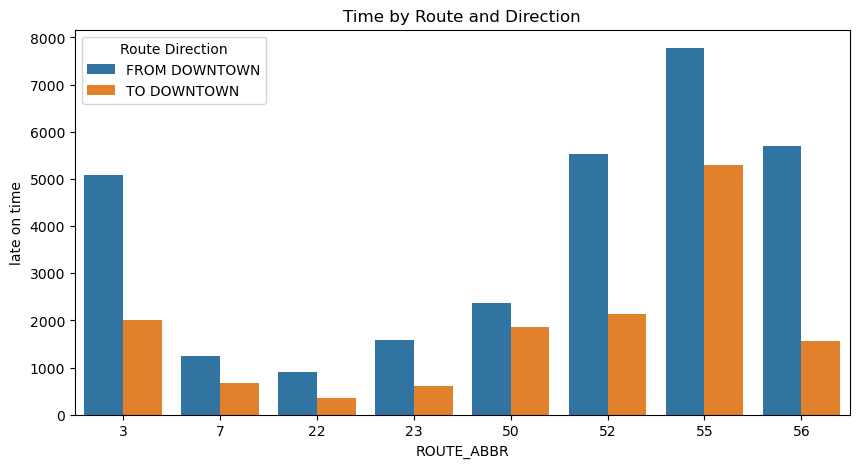

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(data=wego_avg_route, x='ROUTE_ABBR', y='late', hue='ROUTE_DIRECTION_NAME')
plt.title('Time by Route and Direction')
plt.ylabel('late on time')
plt.legend(title='Route Direction')